### 전체 코드

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 16)                48        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 17        
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________
Train on 1400 samples, validate on 600 samples
Epoch 1/200
1400/1400 - 0s - loss: 23.5454 - val_loss: 1.7744
Epoch 2/200
1400/1400 - 0s - loss: 1.6720 - val_loss: 1.5569
Epoch 3/200
1400/1400 - 0s - loss: 1.4522 - val_loss: 1.3311
Epoch 4/200
1400/1400 - 0s - loss: 1.2638 - val_loss: 1.1770
Epoch 5/200
1400/1400 - 0s - loss: 1.1066 - val_loss: 1.0287
Epoch 6/200
1400/1400 - 0s - loss: 0.9698 - val_loss: 0.8964
Epoch 7/200
1400/1400 - 0s - loss: 0.8531 - val_loss: 0.7880
Epoch 8/200
1400/1400 - 0s - loss: 0.7534 - 

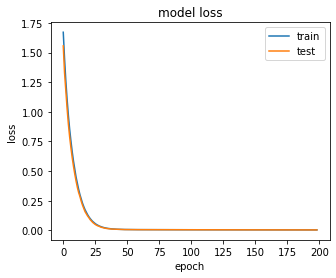

y actual value =  11.3
y predicted value = 11.2297735


In [97]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import initializers

def generator_sequential_model():

    model = Sequential( [
    Input(2, name = 'input_layer'),                             #첫 Layer에서 2개의 변수로부터 값을 받고 
    Dense(16, activation = 'sigmoid', name = 'hidden_layer1' ,kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42)) , # 뉴런 16개에 전달 , 시그모이드함수 사용
    Dense(1, activation = 'relu', name = 'output_layer',kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42))        # 하나의 y값 받아냄
])
    
    model.summary()
#     print(model.layers[0].get_weights())                      # 위에서 weight값 고정시켰기때문에 고정된 weight값 출력이 된다.
#     print(model.layers[1].get_weights())
    model.compile(optimizer = 'sgd', loss = 'mse')
    return model 


def generator_linear_regression_dateset(numofsamples = 650,w1 = 3, w2 =5, b=10):
    np.random.seed(0)
    X = np.random.rand(numofsamples,2)         # 입력값을 랜덤으로 650개 생성
    coef = np.array([w1,w2])
    bias = b
    
    y = np.matmul(X,coef.transpose()) + bias    #matmul : 행렬곱
#     print(X, y)
#     print(X.shape,coef.shape, y.shape)

    return X, y

import matplotlib.pyplot as plt

def plot_loss_curve(history):
    plt.figure(figsize = (5,4))
    
    plt.plot(history.history['loss'][1:])
    plt.plot(history.history['val_loss'][1:])
    
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'], loc ='upper right')
    
    plt.show()
    
def predict_new_sample(model, x, w1=3, w2=5, b = 10):
    
    x= x.reshape(1,2)
    y_pred = model.predict(x)[0][0]
    
    y_actual = w1*x[0][0] + w2*x[0][1] + b
    
    print('y actual value = ', y_actual)
    print('y predicted value =', y_pred)
    
    

model = generator_sequential_model()
X,y = generator_linear_regression_dateset(numofsamples = 2000)
histroy = model.fit(X, y, epochs =200, verbose =2 , validation_split = 0.3)
plot_loss_curve(histroy)

predict_new_sample(model, np.array([0.1,0.2]))



-----------------------------------------------------

### 코드 분석

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import initializers

# y = 3*x1 + 5*x2 + 10


.

### 모델 생성
input data가 2개   
hidden layer의 뉴런 16개   
따라서 2*16 + 16(bias) = 48개이다.  

In [31]:
def generator_sequential_model():

    model = Sequential( [
    Input(2, name = 'input_layer'),                             #첫 Layer에서 2개의 변수로부터 값을 받고 
    Dense(16, activation = 'sigmoid', name = 'hidden_layer1' ) ,# 뉴런 16개에 전달 , 시그모이드함수 사용
    Dense(1, activation = 'relu', name = 'output_layer')        # 하나의 y값 받아냄
])

    model.summary()
    print(model.layers[0].get_weights())                       # w1 : weight 값 출력  -> 계속 변함
    print(model.layers[1].get_weights())                      # w2 : weight 값 출력
    model.compile(optimizer = 'sgd', loss = 'mse')
    return model 

generator_sequential_model()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 16)                48        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 17        
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________
[array([[ 0.43953562, -0.07183993, -0.3676776 , -0.21510962,  0.33109516,
        -0.06613499,  0.43098438, -0.33705217,  0.2983052 , -0.5630134 ,
        -0.48322612,  0.43091393,  0.18554986, -0.2900347 , -0.2783879 ,
         0.56213987],
       [-0.09689876, -0.46307498,  0.04342604,  0.16774952, -0.2582003 ,
         0.07682538,  0.48383093, -0.22891298,  0.33618045,  0.48451102,
        -0.26349986, -0.33381587, -0.2775243 , -0.26798218,  0.4185629 ,
        -0.44841212]], dtype=float32), array([0., 0., 0., 

.


## linear regression 모델링

- Sample Data 생성  
  데이터 개수 >= [weight(파라미터)개수/ (1-정확도)]   
  65 / (1-0.9) = 650  
  따라서 650개 이상의  sample data 랜덤으로 설정  
 
- w1, w2, b 가중치와 bias 설정
- X : 샘플 데이터 랜덤으로 x1, x2 각 각 650개 생성
- 회귀계수(w1, w2) 행렬화
- matmul통해서 X와 coef 행렬곱
- sample data 통한 y 구현





In [4]:
def generator_linear_regression_dateset(numofsamples = 650,w1 = 3, w2 =5, b=10):
    np.random.seed(0)
    X = np.random.rand(numofsamples,2)         # 입력값을 랜덤으로 650개 생성
    coef = np.array([w1,w2])
    bias = b
    
    y = np.matmul(X,coef.transpose()) + bias    #matmul : 행렬곱
    return X, y

# generator_linear_regression_dateset()

.

   
## fit 함수 
- X, y 데이터 입력
- epochs : 몇 번 scan하며 모델을 만들지 결정 (충분히 주어야 학습이 된다.)
- verbose : 실제 training 할때의 과정에서 loss 값을 표현
- validation_split : 전체 데이터를 자체적으로 Train / Test 데이터로 나누어줌 ( 할당 값=a 이면, Train : 1-a만큼 사용 , Test에 a만큼 사용) 
   
1) model 구성  
2) data smaple 만들고  
3) 구성한 모델에 대해서 data sample 통해서 Training   -> fit 함수 이용   

In [34]:
# model = generator_sequential_model()
# generator_linear_regression_dateset()
# model.fit(X, y, epochs =30, verbose =2 , validation_split = 0.3)

model = generator_sequential_model()
X,y = generator_linear_regression_dateset(numofsamples = 1000)
histroy = model.fit(X, y, epochs =30, verbose =2 , validation_split = 0.3)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 16)                48        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 17        
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________
[array([[ 0.39737207,  0.39086616,  0.24925268,  0.45518494,  0.0180583 ,
        -0.06911445,  0.06311548,  0.367904  ,  0.42336333,  0.01909852,
         0.38329643, -0.10133222, -0.11820355, -0.54215413, -0.56392145,
         0.02429706],
       [-0.36506498,  0.00646889,  0.48777962,  0.21159828,  0.06059772,
        -0.5348037 ,  0.25311327, -0.11071768, -0.04407394, -0.55646694,
        -0.32081637, -0.301778  ,  0.02128112, -0.29207236, -0.33169162,
        -0.52907455]], dtype=float32), array([0., 0., 0., 

.

## plot_loss_curve Graph  
- history에 따라 나오는 값들(epoch가 증가함에따라 loss의 변화량) 그래프로 알아보기 위한 함수
- figure : 크기 
- 각 loss들을 plot
- 제목 x,y축 이름
- 각 곡선의 이름 라벨링

In [6]:
import matplotlib.pyplot as plt

def plot_loss_curve(history):
    plt.figure(figsize = (6,4))
    
    plt.plot(history.history['loss'][1:])
    plt.plot(history.history['val_loss'][1:])
    
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'], loc ='upper right')
    
    plt.show()

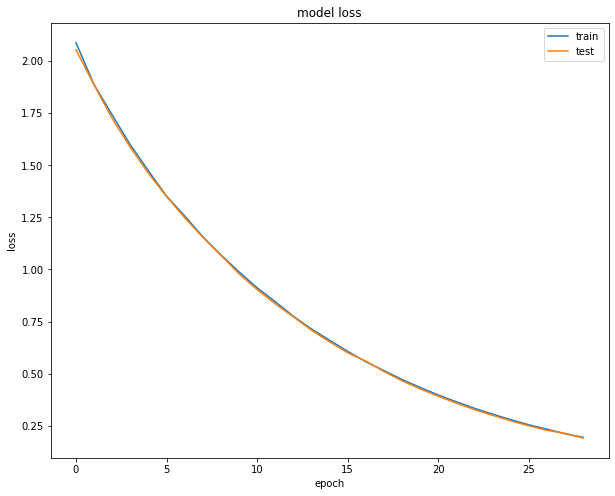

In [11]:
plot_loss_curve(histroy)

Train on 700 samples, validate on 300 samples
Epoch 1/50
700/700 - 0s - loss: 0.2710 - val_loss: 0.2746
Epoch 2/50
700/700 - 0s - loss: 0.2532 - val_loss: 0.2545
Epoch 3/50
700/700 - 0s - loss: 0.2363 - val_loss: 0.2364
Epoch 4/50
700/700 - 0s - loss: 0.2197 - val_loss: 0.2183
Epoch 5/50
700/700 - 0s - loss: 0.2050 - val_loss: 0.2031
Epoch 6/50
700/700 - 0s - loss: 0.1918 - val_loss: 0.1891
Epoch 7/50
700/700 - 0s - loss: 0.1779 - val_loss: 0.1775
Epoch 8/50
700/700 - 0s - loss: 0.1659 - val_loss: 0.1641
Epoch 9/50
700/700 - 0s - loss: 0.1540 - val_loss: 0.1525
Epoch 10/50
700/700 - 0s - loss: 0.1433 - val_loss: 0.1442
Epoch 11/50
700/700 - 0s - loss: 0.1330 - val_loss: 0.1323
Epoch 12/50
700/700 - 0s - loss: 0.1241 - val_loss: 0.1229
Epoch 13/50
700/700 - 0s - loss: 0.1155 - val_loss: 0.1164
Epoch 14/50
700/700 - 0s - loss: 0.1078 - val_loss: 0.1069
Epoch 15/50
700/700 - 0s - loss: 0.1001 - val_loss: 0.0989
Epoch 16/50
700/700 - 0s - loss: 0.0932 - val_loss: 0.0924
Epoch 17/50
700/700

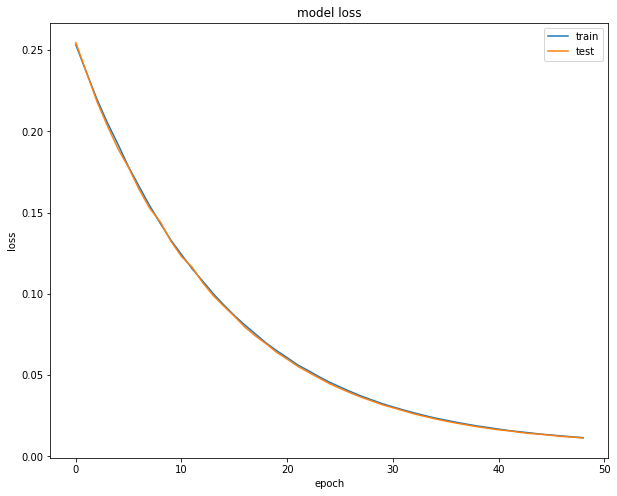

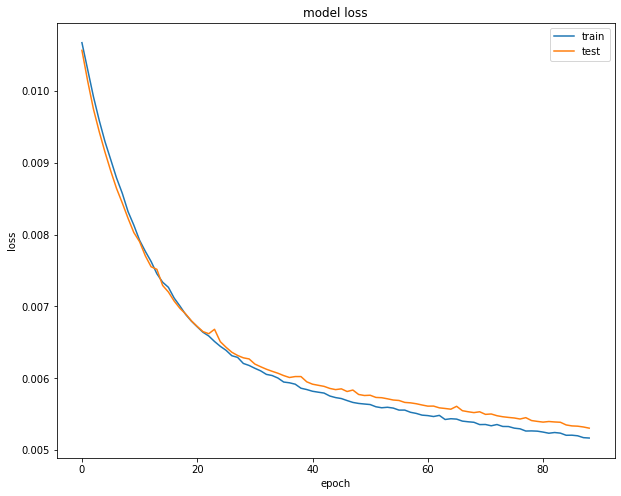

In [32]:
histroy1 = model.fit(X, y, epochs =50, verbose =2 , validation_split = 0.3)
histroy2 = model.fit(X, y, epochs =90, verbose =2 , validation_split = 0.3)

plot_loss_curve(histroy1)
plot_loss_curve(histroy2 )

Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 - 0s - loss: 0.0052 - val_loss: 0.0053
Epoch 2/100
700/700 - 0s - loss: 0.0051 - val_loss: 0.0053
Epoch 3/100
700/700 - 0s - loss: 0.0051 - val_loss: 0.0053
Epoch 4/100
700/700 - 0s - loss: 0.0051 - val_loss: 0.0053
Epoch 5/100
700/700 - 0s - loss: 0.0051 - val_loss: 0.0053
Epoch 6/100
700/700 - 0s - loss: 0.0051 - val_loss: 0.0053
Epoch 7/100
700/700 - 0s - loss: 0.0051 - val_loss: 0.0053
Epoch 8/100
700/700 - 0s - loss: 0.0051 - val_loss: 0.0052
Epoch 9/100
700/700 - 0s - loss: 0.0051 - val_loss: 0.0052
Epoch 10/100
700/700 - 0s - loss: 0.0051 - val_loss: 0.0052
Epoch 11/100
700/700 - 0s - loss: 0.0051 - val_loss: 0.0052
Epoch 12/100
700/700 - 0s - loss: 0.0050 - val_loss: 0.0052
Epoch 13/100
700/700 - 0s - loss: 0.0051 - val_loss: 0.0052
Epoch 14/100
700/700 - 0s - loss: 0.0050 - val_loss: 0.0052
Epoch 15/100
700/700 - 0s - loss: 0.0050 - val_loss: 0.0052
Epoch 16/100
700/700 - 0s - loss: 0.0050 - val_loss: 0.0051
Epo

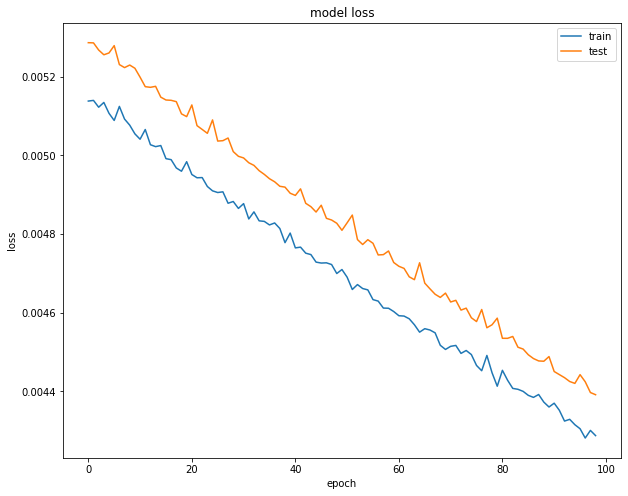

In [33]:
histroy2 = model.fit(X, y, epochs =100, verbose =2 , validation_split = 0.3)
plot_loss_curve(histroy2 )

위에서 볼 수 있듯이 epochs 값이 증가함에 따라 loss가 감소함을 볼 수 있다.  
따라서 비슷하던 곡선 epoch - loss 곡선도 선형모형에 비슷한 직선으로 변화가 되어가고있다.  

.


또한 sample의 개수에 따른 아래의 그래프 변화를 관찰해보면, 

sample의 개수가 증가할 수록 loss의 범위도 작아지게 된다.
sample의 개수가 50일때 loss의 범위는 20단위로 140이상까지 증가하게 된다. 

하지만 sample 개수가 100개 일때는, loss의 범위가 모두 2 이하로 나타나게 된다.



Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 16)                48        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 17        
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________
[array([[-0.22909468, -0.04305393,  0.5127319 ,  0.42781496,  0.2642374 ,
         0.00361913, -0.0195027 , -0.4317258 ,  0.5754417 , -0.22182655,
        -0.3600545 ,  0.08440733, -0.14080709,  0.50806344,  0.36488247,
        -0.47130075],
       [ 0.43497515, -0.4506104 , -0.25459287, -0.21571374,  0.24467468,
        -0.1553846 , -0.4234122 ,  0.25765258, -0.15508372,  0.03498799,
         0.08177543,  0.35031074, -0.250755  , -0.38266915,  0.09785032,
        -0.1532959 ]], dtype=float32), array([0., 0., 0., 

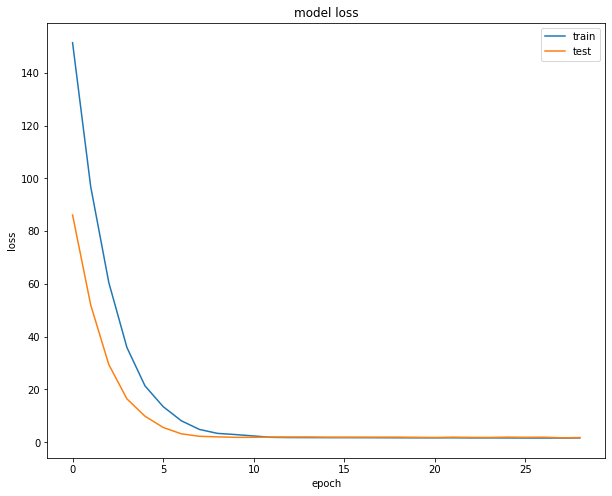

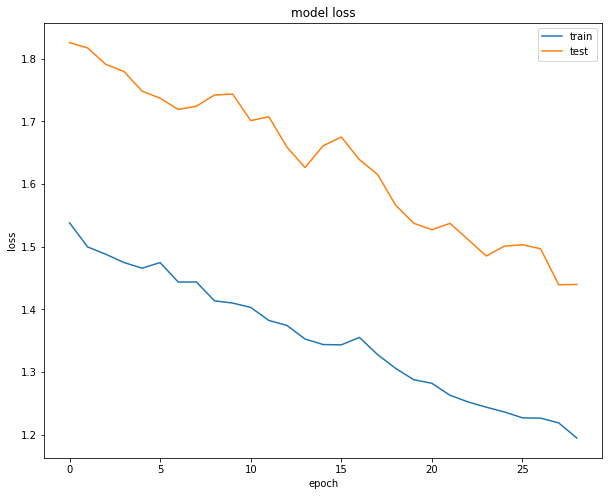

In [35]:
model = generator_sequential_model()
X1,y1 = generator_linear_regression_dateset(numofsamples = 50)
X2,y2 = generator_linear_regression_dateset(numofsamples = 100)
histroy1 = model.fit(X1, y1, epochs =30, verbose =2 , validation_split = 0.3)
histroy2 = model.fit(X2, y2, epochs =30, verbose =2 , validation_split = 0.3)

plot_loss_curve(histroy1)
plot_loss_curve(histroy2)

그러면 sample의 개수가 적을때, epochs 값을 증가시키면 어떻게 될까? 


Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 16)                48        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 17        
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________
[array([[-0.39499128, -0.573622  ,  0.27712196, -0.2890918 ,  0.2585038 ,
        -0.54948735, -0.3091755 , -0.15049455, -0.43072838,  0.40924615,
         0.2245022 , -0.35526603,  0.23948896, -0.49063906, -0.00736982,
         0.00069129],
       [-0.08752859, -0.37758628, -0.50383896,  0.13088477, -0.02360988,
         0.30079836, -0.33784753,  0.3456906 ,  0.00414455, -0.20337445,
         0.47525036, -0.11639756, -0.24422073, -0.00363153, -0.20875385,
         0.48177242]], dtype=float32), array([0., 0., 0., 

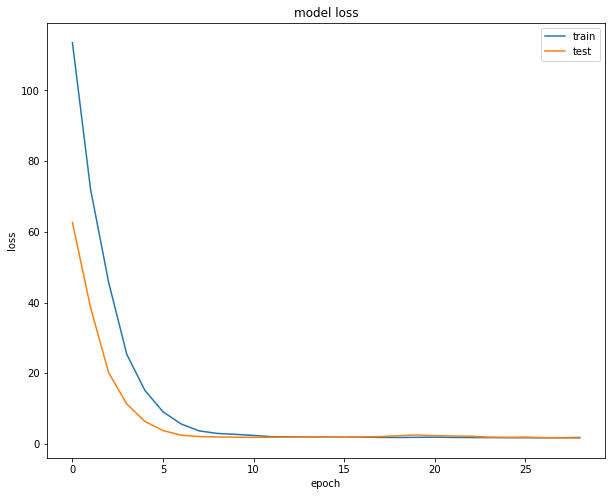

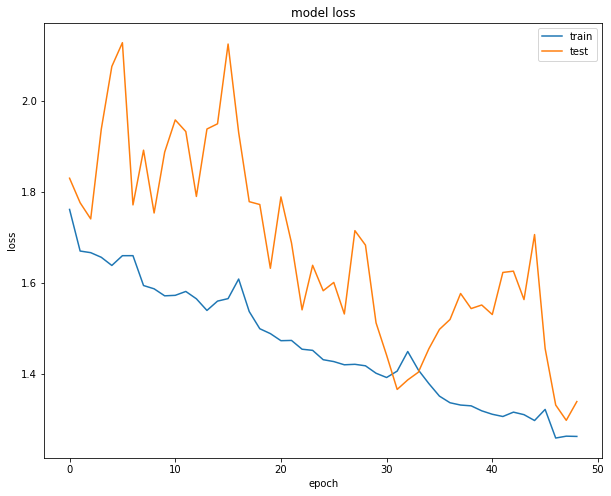

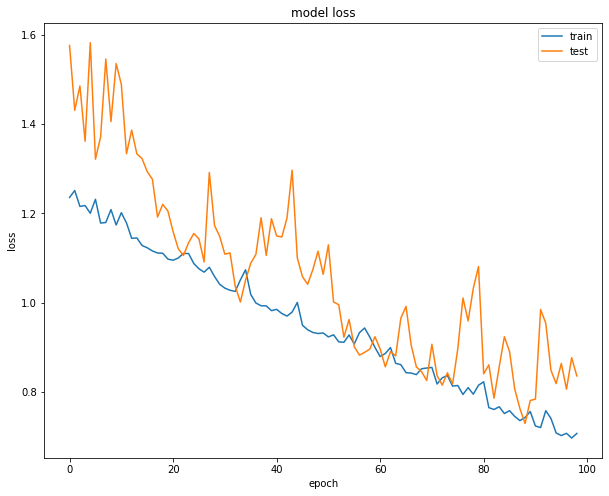

In [38]:
model = generator_sequential_model()
X1,y1 = generator_linear_regression_dateset(numofsamples = 50)
histroy1 = model.fit(X1, y1, epochs =30, verbose =2 , validation_split = 0.3)
histroy2 = model.fit(X1, y1, epochs =50, verbose =2 , validation_split = 0.3)
histroy3 = model.fit(X1, y1, epochs =100, verbose =2 , validation_split = 0.3)

plot_loss_curve(histroy1)
plot_loss_curve(histroy2)
plot_loss_curve(histroy3)

위에서 볼 수 있듯이 epoch값이 많으면 많아질수록 loss가 감소하지만, 일정량이 되면 그 감소 범위도 줄어들게 된다.
하지만 sample data가 많아지는것에비해 epochs만 증가하는 것은 큰 변동(불안정)이 있다.
따라서 sample data를 많이 확보하는것이 정확도를 높일수 있게된다.

### 따라서 sample개수는 많으면 많을수록 좋다. 
### 왜냐하면 tensorflow는 딥러닝기반, 다시말해서 복잡한 신경망(Deep Neural Network) 기반이기때문에
### 데이터가 많으면 많을 수록 더 좋은 성능을 나타낼 수 있다. (loss 비용 감소)

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 16)                48        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 17        
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________
[array([[-0.42781872,  0.28518152, -0.28674388,  0.29868376, -0.12326348,
        -0.29217365,  0.01509511, -0.3409305 , -0.2659817 , -0.2448754 ,
         0.43604803,  0.5116738 ,  0.22988176, -0.39269745, -0.43767273,
         0.39956182],
       [ 0.08007282,  0.12676102, -0.50102895,  0.08528858, -0.5531102 ,
        -0.08075365,  0.18955868, -0.46000758,  0.21703643, -0.3130783 ,
        -0.097489  , -0.00059205,  0.5258802 , -0.46233085, -0.17055514,
        -0.10936415]], dtype=float32), array([0., 0., 0., 

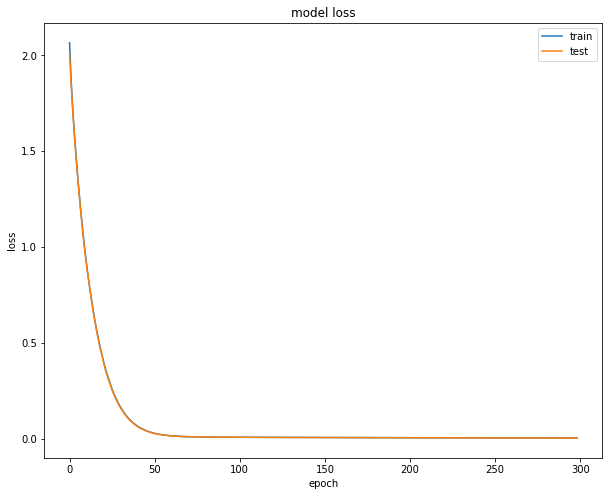

In [60]:
model = generator_sequential_model()
X1,y1 = generator_linear_regression_dateset(numofsamples = 1000)
histroy1 = model.fit(X1, y1, epochs =300, verbose =2 , validation_split = 0.3)
plot_loss_curve(histroy1)

loss = 0.0034 , val_loss = 0.0034
이처럼 0에 수렴하는 값을 할당받을 수 있다.

.

### 이제 예측을 해보겠습니다.

- model은 


In [70]:
def predict_new_sample(model, x, w1=3, w2=5, b = 10):
    
    x= x.reshape(1,2)
    y_pred = model.predict(x)[0][0]
    
    y_actual = w1*x[0][0] + w2*x[0][1] + b
    
    print('y actual value = ', y_actual)
    print('y predicted value =', y_pred)
    

Train on 35 samples, validate on 15 samples
Epoch 1/50
35/35 - 0s - loss: 0.0039 - val_loss: 0.0021
Epoch 2/50
35/35 - 0s - loss: 0.0039 - val_loss: 0.0022
Epoch 3/50
35/35 - 0s - loss: 0.0038 - val_loss: 0.0021
Epoch 4/50
35/35 - 0s - loss: 0.0038 - val_loss: 0.0022
Epoch 5/50
35/35 - 0s - loss: 0.0038 - val_loss: 0.0022
Epoch 6/50
35/35 - 0s - loss: 0.0038 - val_loss: 0.0021
Epoch 7/50
35/35 - 0s - loss: 0.0039 - val_loss: 0.0021
Epoch 8/50
35/35 - 0s - loss: 0.0040 - val_loss: 0.0021
Epoch 9/50
35/35 - 0s - loss: 0.0038 - val_loss: 0.0023
Epoch 10/50
35/35 - 0s - loss: 0.0038 - val_loss: 0.0022
Epoch 11/50
35/35 - 0s - loss: 0.0038 - val_loss: 0.0023
Epoch 12/50
35/35 - 0s - loss: 0.0038 - val_loss: 0.0023
Epoch 13/50
35/35 - 0s - loss: 0.0038 - val_loss: 0.0025
Epoch 14/50
35/35 - 0s - loss: 0.0039 - val_loss: 0.0026
Epoch 15/50
35/35 - 0s - loss: 0.0040 - val_loss: 0.0026
Epoch 16/50
35/35 - 0s - loss: 0.0040 - val_loss: 0.0027
Epoch 17/50
35/35 - 0s - loss: 0.0041 - val_loss: 0.0

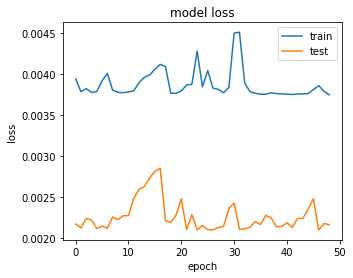

y actual value =  11.3
y predicted value = 11.222469


In [85]:
X,y = generator_linear_regression_dateset(numofsamples = 50)
histroy = model.fit(X, y, epochs =50, verbose =2 , validation_split = 0.3)
plot_loss_curve(histroy)
predict_new_sample(model, np.array([0.1,0.2]))

Train on 210 samples, validate on 90 samples
Epoch 1/50
210/210 - 0s - loss: 0.0049 - val_loss: 0.0079
Epoch 2/50
210/210 - 0s - loss: 0.0049 - val_loss: 0.0079
Epoch 3/50
210/210 - 0s - loss: 0.0049 - val_loss: 0.0080
Epoch 4/50
210/210 - 0s - loss: 0.0049 - val_loss: 0.0079
Epoch 5/50
210/210 - 0s - loss: 0.0049 - val_loss: 0.0079
Epoch 6/50
210/210 - 0s - loss: 0.0049 - val_loss: 0.0079
Epoch 7/50
210/210 - 0s - loss: 0.0049 - val_loss: 0.0078
Epoch 8/50
210/210 - 0s - loss: 0.0049 - val_loss: 0.0079
Epoch 9/50
210/210 - 0s - loss: 0.0049 - val_loss: 0.0078
Epoch 10/50
210/210 - 0s - loss: 0.0049 - val_loss: 0.0079
Epoch 11/50
210/210 - 0s - loss: 0.0049 - val_loss: 0.0079
Epoch 12/50
210/210 - 0s - loss: 0.0049 - val_loss: 0.0079
Epoch 13/50
210/210 - 0s - loss: 0.0049 - val_loss: 0.0079
Epoch 14/50
210/210 - 0s - loss: 0.0049 - val_loss: 0.0077
Epoch 15/50
210/210 - 0s - loss: 0.0049 - val_loss: 0.0078
Epoch 16/50
210/210 - 0s - loss: 0.0049 - val_loss: 0.0078
Epoch 17/50
210/210 

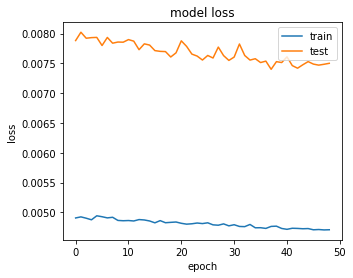

y actual value =  11.3
y predicted value = 11.229479


In [84]:
X,y = generator_linear_regression_dateset(numofsamples = 300)
histroy = model.fit(X, y, epochs =50, verbose =2 , validation_split = 0.3)
plot_loss_curve(histroy)
predict_new_sample(model, np.array([0.1,0.2]))


Train on 35 samples, validate on 15 samples
Epoch 1/20
35/35 - 0s - loss: 0.0037 - val_loss: 0.0021
Epoch 2/20
35/35 - 0s - loss: 0.0038 - val_loss: 0.0022
Epoch 3/20
35/35 - 0s - loss: 0.0038 - val_loss: 0.0023
Epoch 4/20
35/35 - 0s - loss: 0.0038 - val_loss: 0.0024
Epoch 5/20
35/35 - 0s - loss: 0.0038 - val_loss: 0.0022
Epoch 6/20
35/35 - 0s - loss: 0.0038 - val_loss: 0.0023
Epoch 7/20
35/35 - 0s - loss: 0.0038 - val_loss: 0.0023
Epoch 8/20
35/35 - 0s - loss: 0.0038 - val_loss: 0.0021
Epoch 9/20
35/35 - 0s - loss: 0.0039 - val_loss: 0.0021
Epoch 10/20
35/35 - 0s - loss: 0.0038 - val_loss: 0.0023
Epoch 11/20
35/35 - 0s - loss: 0.0038 - val_loss: 0.0022
Epoch 12/20
35/35 - 0s - loss: 0.0038 - val_loss: 0.0024
Epoch 13/20
35/35 - 0s - loss: 0.0038 - val_loss: 0.0024
Epoch 14/20
35/35 - 0s - loss: 0.0038 - val_loss: 0.0025
Epoch 15/20
35/35 - 0s - loss: 0.0039 - val_loss: 0.0021
Epoch 16/20
35/35 - 0s - loss: 0.0038 - val_loss: 0.0021
Epoch 17/20
35/35 - 0s - loss: 0.0038 - val_loss: 0.0

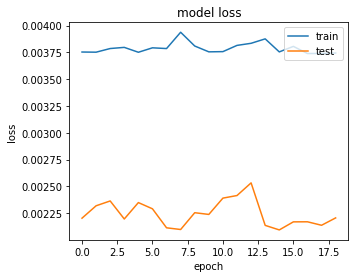

y actual value =  11.3
y predicted value = 11.220322


In [86]:
X,y = generator_linear_regression_dateset(numofsamples = 50)
histroy = model.fit(X, y, epochs =20, verbose =2 , validation_split = 0.3)
plot_loss_curve(histroy)
predict_new_sample(model, np.array([0.1,0.2]))


Train on 35 samples, validate on 15 samples
Epoch 1/50
35/35 - 0s - loss: 0.0038 - val_loss: 0.0021
Epoch 2/50
35/35 - 0s - loss: 0.0037 - val_loss: 0.0022
Epoch 3/50
35/35 - 0s - loss: 0.0037 - val_loss: 0.0021
Epoch 4/50
35/35 - 0s - loss: 0.0037 - val_loss: 0.0021
Epoch 5/50
35/35 - 0s - loss: 0.0037 - val_loss: 0.0021
Epoch 6/50
35/35 - 0s - loss: 0.0037 - val_loss: 0.0021
Epoch 7/50
35/35 - 0s - loss: 0.0038 - val_loss: 0.0021
Epoch 8/50
35/35 - 0s - loss: 0.0037 - val_loss: 0.0021
Epoch 9/50
35/35 - 0s - loss: 0.0037 - val_loss: 0.0021
Epoch 10/50
35/35 - 0s - loss: 0.0040 - val_loss: 0.0021
Epoch 11/50
35/35 - 0s - loss: 0.0037 - val_loss: 0.0021
Epoch 12/50
35/35 - 0s - loss: 0.0037 - val_loss: 0.0021
Epoch 13/50
35/35 - 0s - loss: 0.0037 - val_loss: 0.0023
Epoch 14/50
35/35 - 0s - loss: 0.0037 - val_loss: 0.0022
Epoch 15/50
35/35 - 0s - loss: 0.0037 - val_loss: 0.0021
Epoch 16/50
35/35 - 0s - loss: 0.0037 - val_loss: 0.0021
Epoch 17/50
35/35 - 0s - loss: 0.0038 - val_loss: 0.0

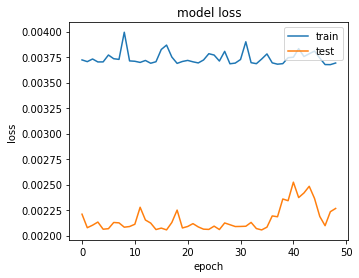

y actual value =  11.3
y predicted value = 11.21589


In [88]:
X,y = generator_linear_regression_dateset(numofsamples = 50)
histroy = model.fit(X, y, epochs =50, verbose =2 , validation_split = 0.3)
plot_loss_curve(histroy)
predict_new_sample(model, np.array([0.1,0.2]))


Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 - 0s - loss: 0.0025 - val_loss: 0.0025
Epoch 2/100
700/700 - 0s - loss: 0.0025 - val_loss: 0.0025
Epoch 3/100
700/700 - 0s - loss: 0.0024 - val_loss: 0.0025
Epoch 4/100
700/700 - 0s - loss: 0.0025 - val_loss: 0.0025
Epoch 5/100
700/700 - 0s - loss: 0.0025 - val_loss: 0.0025
Epoch 6/100
700/700 - 0s - loss: 0.0025 - val_loss: 0.0025
Epoch 7/100
700/700 - 0s - loss: 0.0025 - val_loss: 0.0024
Epoch 8/100
700/700 - 0s - loss: 0.0024 - val_loss: 0.0025
Epoch 9/100
700/700 - 0s - loss: 0.0025 - val_loss: 0.0025
Epoch 10/100
700/700 - 0s - loss: 0.0025 - val_loss: 0.0024
Epoch 11/100
700/700 - 0s - loss: 0.0024 - val_loss: 0.0024
Epoch 12/100
700/700 - 0s - loss: 0.0024 - val_loss: 0.0024
Epoch 13/100
700/700 - 0s - loss: 0.0024 - val_loss: 0.0024
Epoch 14/100
700/700 - 0s - loss: 0.0024 - val_loss: 0.0024
Epoch 15/100
700/700 - 0s - loss: 0.0024 - val_loss: 0.0024
Epoch 16/100
700/700 - 0s - loss: 0.0024 - val_loss: 0.0024
Epo

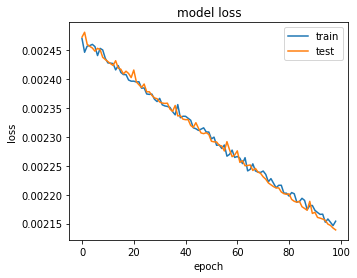

y actual value =  11.3
y predicted value = 11.247248


In [99]:
X,y = generator_linear_regression_dateset(numofsamples = 1000)
histroy = model.fit(X, y, epochs =100, verbose =2 , validation_split = 0.3)
plot_loss_curve(histroy)
predict_new_sample(model, np.array([0.1,0.2]))

## 결론
  
tensorflow의 keras를 통해 신경망으로 선형회귀문제를 풀었습니다.  
실제 값 11.3에 11.262 까지 근접한 값을 얻을 수 있었으므로, 선형회귀문제를 풀었다고 할 수 있습니다.  
  
따라서 이처럼 딥러닝(신경망)으로 선형회귀 문제를 풀 수 있고, 다른 문제들도 풀 수 있다고 합니다.  
전제 조건으로는, 학습시키기에 충분한 데이터가 주어진다면 입니다.  

#### 따라서, 충분한 데이터가 주어지고 성능이 좋은 컴퓨터가있다면, 딥러닝을통해 많은 머신러닝 문제를 풀 수 있게 됩니다!



